## Week 4 Evaluation Metrics for Classification
### 4.1 Evaluation metrics: session overview
First we will reuse the churn prediction model from previous week.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Kolinhtetwin/machine_learning_bootcamp/refs/heads/main/03-classification/2024/telco_customer.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_column = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_column:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [6]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
numerical = ['tenure' , 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [9]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

### 4.2 Accuracy and Dummy model
* Evaluate the model on different thershold
* Check the accuracy of dummy baselines.

In [11]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.269
0.05 0.527
0.10 0.618
0.15 0.671
0.20 0.703
0.25 0.749
0.30 0.761
0.35 0.779
0.40 0.786
0.45 0.792
0.50 0.801
0.55 0.796
0.60 0.789
0.65 0.782
0.70 0.759
0.75 0.747
0.80 0.734
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


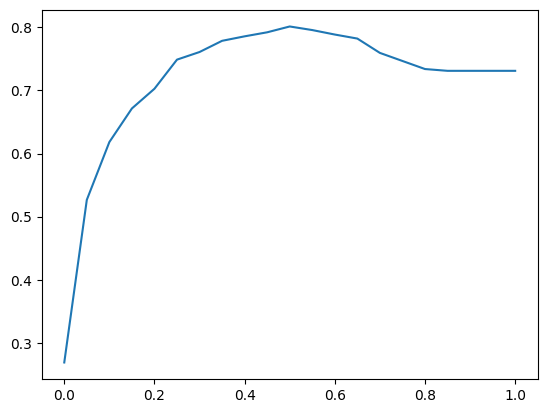

In [12]:
plt.plot(thresholds, scores)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_val, y_pred>=0.5)

0.801277501774308

We can use the "accuracy_score(y_val, y_pred>=0.5)" instead of  "(y_val == churn_decision).mean()"

In [15]:
from collections import Counter

In [16]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

### 4.3 Confusion table
* Different types of errors and correct decisions
* Arranging them in a table

In [17]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [18]:
t = 0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [19]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [20]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [21]:
confusion_matrix = np.array([[tn, fp], [fn, tp]])
confusion_matrix

array([[928, 102],
       [178, 201]])

### 4.4 Precision and Recall

In [22]:
(tp+ tn)/ (tp+fp+tn+fn)

np.float64(0.801277501774308)

In [23]:
p = tp / (tp+fp)
p

np.float64(0.6633663366336634)

Precision is calculating how many predictions are correct in the positive predicted customer. For this model, you can see we have 66% precision which means the model have predict 66% corrected and 34% uncorrected customer which gots email who will not be churned anyway.

In [24]:
r = tp/ (tp+fn)
r

np.float64(0.5303430079155673)

Recall is calculating the fraction of how many corrected prediction in the actual churned data. For this model, you can see that 53% is corrected which means we miss out 47% of customers who will churn but our model predicts no churn.

### 4.5 ROC Curve

TPR and FPR (True Positive Rate and False Negative Rate)

In [25]:
tpr = tp / (fn+ tp)
tpr

np.float64(0.5303430079155673)

In [26]:
fpr = fp / (fp+ tn)
fpr

np.float64(0.09902912621359224)

In [27]:
scores = []
thresholds = np.linspace(0,1,100)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >=t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t,tp,fp,fn,tn))

In [28]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [29]:
df_scores['tpr'] = df_scores.tp / (df_scores.fn+ df_scores.tp)
df_scores['fpr'] = df_scores.fp / (df_scores.tn+ df_scores.fp)

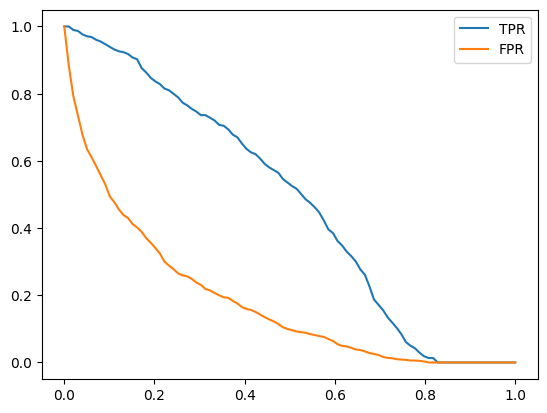

In [30]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()

Random model

In [31]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02], shape=(1409,))

In [32]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.48261178140525196)

In [33]:
def tpr_fpr_dataframe(y_val,y_pred):
    scores = []
    thresholds = np.linspace(0,1,100)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >=t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t,tp,fp,fn,tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.fn+ df_scores.tp)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn+ df_scores.fp)

    return df_scores

In [34]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [35]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.000000,379,1030,0,0,1.000000,1.000000
10,0.101010,336,933,43,97,0.886544,0.905825
20,0.202020,301,826,78,204,0.794195,0.801942
30,0.303030,260,735,119,295,0.686016,0.713592
40,0.404040,215,639,164,391,0.567282,0.620388
50,0.505051,184,531,195,499,0.485488,0.515534
60,0.606061,146,413,233,617,0.385224,0.400971
70,0.707071,99,314,280,716,0.261214,0.304854
80,0.808081,57,212,322,818,0.150396,0.205825
90,0.909091,28,98,351,932,0.073879,0.095146


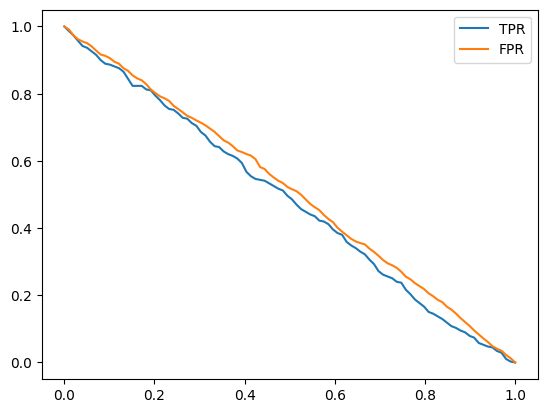

In [36]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

### 

Ideal Model

In [37]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1030), np.int64(379))

In [38]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [39]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [40]:
((y_ideal_pred >=0.731) == y_ideal).mean()

np.float64(1.0)

In [41]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [42]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.000000,379,1030,0,0,1.000000,1.000000
10,0.101010,379,887,0,143,1.000000,0.861165
20,0.202020,379,745,0,285,1.000000,0.723301
30,0.303030,379,603,0,427,1.000000,0.585437
40,0.404040,379,461,0,569,1.000000,0.447573
50,0.505051,379,318,0,712,1.000000,0.308738
60,0.606061,379,176,0,854,1.000000,0.170874
70,0.707071,379,34,0,996,1.000000,0.033010
80,0.808081,271,0,108,1030,0.715040,0.000000
90,0.909091,129,0,250,1030,0.340369,0.000000


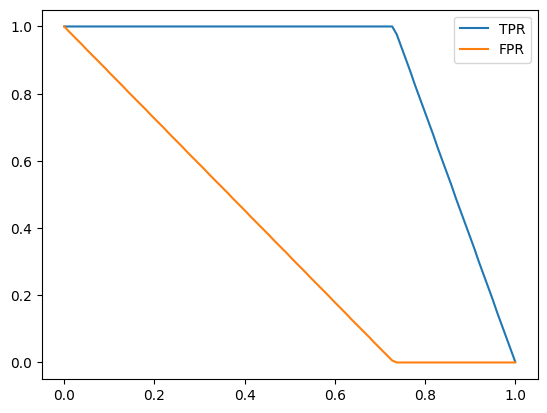

In [43]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

Putting everything together

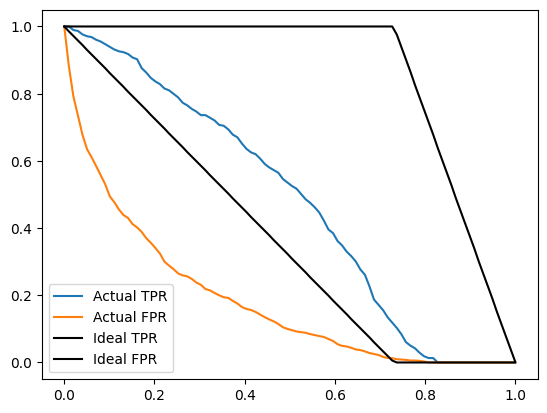

In [44]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'Actual TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'Actual FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'Ideal TPR',color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'Ideal FPR',color='black')

plt.legend()

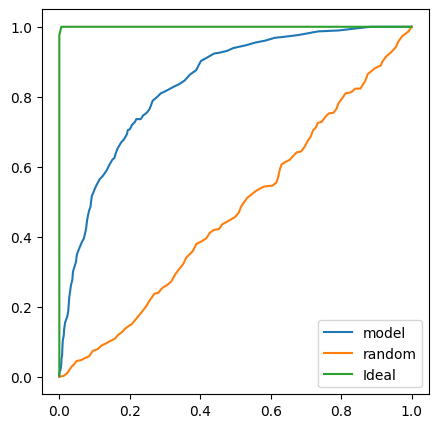

In [45]:
plt.figure(figsize=[5,5])

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'Ideal')
plt.legend()

In [46]:
from sklearn.metrics import roc_curve

In [47]:
fpr, tpr, thresholds= roc_curve(y_val,y_pred)

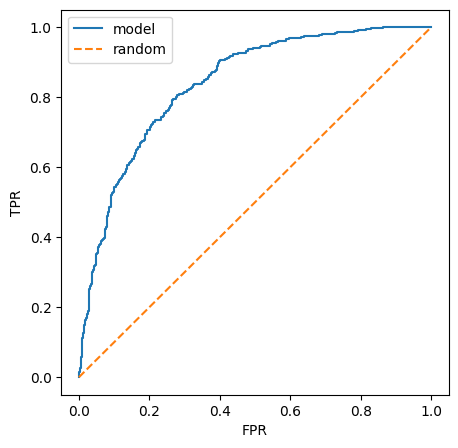

In [48]:
plt.figure(figsize=[5,5])

plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1], [0,1], label = 'random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### 4.6 ROC AUC
* Area Under the Curve

In [49]:
from sklearn.metrics import auc

In [50]:
auc(fpr, tpr)

0.8380485180725978

In [52]:
fpr, tpr, thresholds= roc_curve(y_val,y_pred)
auc(df_scores.fpr, df_scores.tpr)

0.8379306811486539

There is a shortcut using the sklearn metrics module to import ROC_Auc_score.

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_val, y_pred)

0.8380485180725978

In [55]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [56]:
import random

In [65]:
n = 10000
success = 0 
for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success/n

0.8322

In [60]:
pos[pos_ind] > neg[neg_ind]

np.True_

### 4.7 Cross Validation

In [107]:
def train(df, y, C=1.0):
    dicts = df[categorical+ numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y)

    return dv, model

In [95]:
dv, model = train(df_train, y_train, C=0.001)

In [81]:
def predict(df,dv,model):
    dicts = df[categorical+ numerical].to_dict(orient = 'records')

    X= dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [71]:
y_pred = predict(df_val, dv, model)

In [72]:
from sklearn.model_selection import KFold

In [74]:
kfold =  KFold(n_splits = 10, shuffle = True, random_state = 1)

In [85]:
from tqdm.auto import tqdm

In [108]:
n_splits = 5 

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    kfold =  KFold(n_splits = n_splits, shuffle = True, random_state = 1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s % .3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001  0.821 +- 0.006
C=0.01  0.838 +- 0.006
C=0.1  0.841 +- 0.006
C=0.5  0.841 +- 0.006
C=1  0.841 +- 0.006
C=5  0.840 +- 0.006
C=10  0.840 +- 0.006


In [105]:
print('% .3f +- %.3f' % (np.mean(scores), np.std(scores)))

 0.841 +- 0.006


In [102]:
len(df_full_train), len(df_full_train.churn.values)

(5634, 5634)

In [110]:
dv, model = train(df_full_train, df_full_train.churn.values, C=0.1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8627260446965541

In [79]:
len(train_idx), len(val_idx)

(5070, 564)

In [80]:
len(df_full_train)

5634

In [ ]:
df_train = df_full_train.iloc[train_idx]
df_val = df_val.iloc[train_idx]